In [1]:
import tensorflow as tf
from tensorflow.python.keras.backend import set_session
import os
import random
import numpy as np

from keras_unet_collection import models

from tqdm import tqdm 

from PIL import Image
import cv2
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import KFold

2025-03-17 13:39:08.521956: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-17 13:39:08.531734: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-17 13:39:08.534917: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-17 13:39:08.543008: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


ModuleNotFoundError: No module named 'tensorflow.keras'

In [2]:
num_classes = 1
k = 5


IMG_WIDTH = 512
IMG_HEIGHT = 512
IMG_CHANNELS = 1

DATA_PATH = 'data/'

data_ids = next(os.walk(DATA_PATH+'/image'))[2]

X = np.zeros((len(data_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
y = np.zeros((len(data_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)

os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
os.environ['TF_GPU_ALLOCATOR']= 'cuda_malloc_async'


In [3]:
print('Resizing training images and masks')
for n, id_ in tqdm(enumerate(data_ids), total=len(data_ids)):   
    path = DATA_PATH
    img = imread(path + '/image/' + id_)[:,:]
    img = img.reshape(img.shape[0], img.shape[1], IMG_CHANNELS)
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X[n] = img  #Fill empty X_train with values from img
    
    mask = imread(path + 'label/' + id_)
    mask = (mask >= 250)
    mask = np.expand_dims(resize(mask, (IMG_HEIGHT, IMG_WIDTH), mode='constant',  
                                      preserve_range=True), axis=-1)
    y[n] = mask 
    #plt.axis("off")
    #imshow(y[n])
    #plt.show()

Resizing training images and masks


100%|█████████████████████████████████████████████████████████████████████████████████| 838/838 [00:18<00:00, 45.25it/s]


Automated hyper-parameter determination is applied with the following details:
----------
	Number of convolution filters after each full-scale skip connection: filter_num_skip = [16, 16, 16]
	Number of channels of full-scale aggregated feature maps: filter_num_aggregate = 64
----------
deep_supervision = True
names of output tensors are listed as follows ("sup0" is the shallowest supervision layer;
"final" is the final output layer):

	unet3plus_output_sup0_activation
	unet3plus_output_sup1_activation
	unet3plus_output_sup2_activation
	unet3plus_output_final_activation
Epoch 1/300
42/42 ━━━━━━━━━━━━━━━━━━━━ 31s 473ms/step - loss: 2.2021 - unet3plus_output_final_activation_accuracy: 0.9731 - unet3plus_output_final_activation_recall: 0.0424 - val_loss: 2.2701 - val_unet3plus_output_final_activation_accuracy: 0.9993 - val_unet3plus_output_final_activation_recall: 0.0000e+00
Epoch 2/300


/home/mbouzon/miniconda3/envs/tf/lib/python3.9/site-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_recall available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 15s 349ms/step - loss: 1.9384 - unet3plus_output_final_activation_accuracy: 0.9994 - unet3plus_output_final_activation_recall: 0.0000e+00 - val_loss: 1.9691 - val_unet3plus_output_final_activation_accuracy: 0.9993 - val_unet3plus_output_final_activation_recall: 0.0000e+00
Epoch 3/300
42/42 ━━━━━━━━━━━━━━━━━━━━ 15s 350ms/step - loss: 1.8090 - unet3plus_output_final_activation_accuracy: 0.9994 - unet3plus_output_final_activation_recall: 5.2005e-06 - val_loss: 1.7555 - val_unet3plus_output_final_activation_accuracy: 0.9993 - val_unet3plus_output_final_activation_recall: 0.0000e+00
Epoch 4/300
42/42 ━━━━━━━━━━━━━━━━━━━━ 15s 350ms/step - loss: 1.6656 - unet3plus_output_final_activation_accuracy: 0.9994 - unet3plus_output_final_activation_recall: 0.0466 - val_loss: 1.5737 - val_unet3plus_output_final_activation_accuracy: 0.9993 - val_unet3plus_output_final_activation_recall: 0.0000e+00
Epoch 5/300
42/42 ━━━━━━━━━━━━━━━━━━━━ 15s 352ms/step - loss: 1.4957 - unet3plus

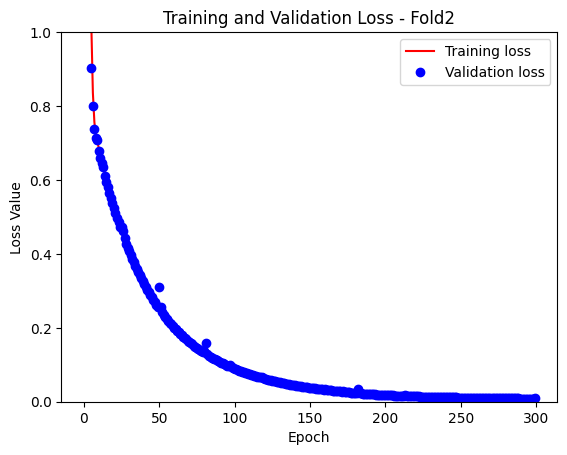

Automated hyper-parameter determination is applied with the following details:
----------
	Number of convolution filters after each full-scale skip connection: filter_num_skip = [16, 16, 16]
	Number of channels of full-scale aggregated feature maps: filter_num_aggregate = 64
----------
deep_supervision = True
names of output tensors are listed as follows ("sup0" is the shallowest supervision layer;
"final" is the final output layer):

	unet3plus_output_sup0_activation
	unet3plus_output_sup1_activation
	unet3plus_output_sup2_activation
	unet3plus_output_final_activation
Epoch 1/300
42/42 ━━━━━━━━━━━━━━━━━━━━ 31s 478ms/step - loss: 2.0221 - unet3plus_output_final_activation_accuracy: 0.9698 - unet3plus_output_final_activation_recall: 0.0681 - val_loss: 1.9380 - val_unet3plus_output_final_activation_accuracy: 0.9994 - val_unet3plus_output_final_activation_recall: 0.0000e+00
Epoch 2/300


/home/mbouzon/miniconda3/envs/tf/lib/python3.9/site-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_recall available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 15s 351ms/step - loss: 1.3910 - unet3plus_output_final_activation_accuracy: 0.9994 - unet3plus_output_final_activation_recall: 0.0000e+00 - val_loss: 1.3420 - val_unet3plus_output_final_activation_accuracy: 0.9994 - val_unet3plus_output_final_activation_recall: 0.0000e+00
Epoch 3/300
42/42 ━━━━━━━━━━━━━━━━━━━━ 21s 351ms/step - loss: 1.0131 - unet3plus_output_final_activation_accuracy: 0.9993 - unet3plus_output_final_activation_recall: 0.0000e+00 - val_loss: 0.9539 - val_unet3plus_output_final_activation_accuracy: 0.9994 - val_unet3plus_output_final_activation_recall: 0.0000e+00
Epoch 4/300
42/42 ━━━━━━━━━━━━━━━━━━━━ 15s 352ms/step - loss: 0.8648 - unet3plus_output_final_activation_accuracy: 0.9994 - unet3plus_output_final_activation_recall: 2.3908e-04 - val_loss: 0.8557 - val_unet3plus_output_final_activation_accuracy: 0.9994 - val_unet3plus_output_final_activation_recall: 0.0000e+00
Epoch 5/300
42/42 ━━━━━━━━━━━━━━━━━━━━ 15s 352ms/step - loss: 0.8155 - unet3

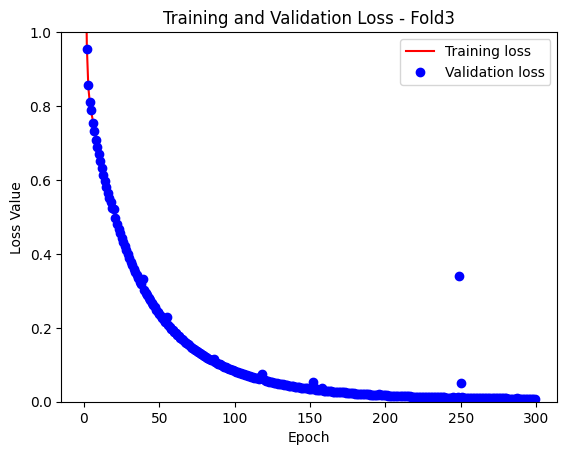

Automated hyper-parameter determination is applied with the following details:
----------
	Number of convolution filters after each full-scale skip connection: filter_num_skip = [16, 16, 16]
	Number of channels of full-scale aggregated feature maps: filter_num_aggregate = 64
----------
deep_supervision = True
names of output tensors are listed as follows ("sup0" is the shallowest supervision layer;
"final" is the final output layer):

	unet3plus_output_sup0_activation
	unet3plus_output_sup1_activation
	unet3plus_output_sup2_activation
	unet3plus_output_final_activation
Epoch 1/300
42/42 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - loss: 2.0709 - unet3plus_output_final_activation_accuracy: 0.9373 - unet3plus_output_final_activation_recall: 0.0909 - val_loss: 1.9473 - val_unet3plus_output_final_activation_accuracy: 0.9994 - val_unet3plus_output_final_activation_recall: 0.0000e+00
Epoch 2/300


/home/mbouzon/miniconda3/envs/tf/lib/python3.9/site-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_recall available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 15s 353ms/step - loss: 1.3853 - unet3plus_output_final_activation_accuracy: 0.9994 - unet3plus_output_final_activation_recall: 0.0000e+00 - val_loss: 1.4720 - val_unet3plus_output_final_activation_accuracy: 0.9994 - val_unet3plus_output_final_activation_recall: 0.0000e+00
Epoch 3/300
42/42 ━━━━━━━━━━━━━━━━━━━━ 15s 353ms/step - loss: 1.2478 - unet3plus_output_final_activation_accuracy: 0.9994 - unet3plus_output_final_activation_recall: 0.0000e+00 - val_loss: 1.2405 - val_unet3plus_output_final_activation_accuracy: 0.9994 - val_unet3plus_output_final_activation_recall: 0.0000e+00
Epoch 4/300
42/42 ━━━━━━━━━━━━━━━━━━━━ 15s 353ms/step - loss: 1.1470 - unet3plus_output_final_activation_accuracy: 0.9994 - unet3plus_output_final_activation_recall: 3.3958e-06 - val_loss: 1.1049 - val_unet3plus_output_final_activation_accuracy: 0.9994 - val_unet3plus_output_final_activation_recall: 0.0000e+00
Epoch 5/300
42/42 ━━━━━━━━━━━━━━━━━━━━ 15s 353ms/step - loss: 1.0513 - unet3

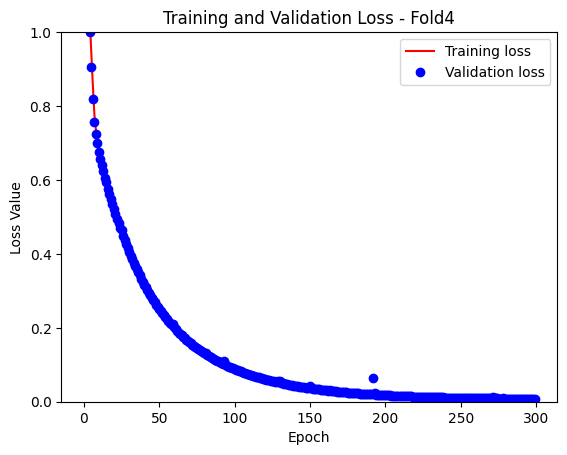

Automated hyper-parameter determination is applied with the following details:
----------
	Number of convolution filters after each full-scale skip connection: filter_num_skip = [16, 16, 16]
	Number of channels of full-scale aggregated feature maps: filter_num_aggregate = 64
----------
deep_supervision = True
names of output tensors are listed as follows ("sup0" is the shallowest supervision layer;
"final" is the final output layer):

	unet3plus_output_sup0_activation
	unet3plus_output_sup1_activation
	unet3plus_output_sup2_activation
	unet3plus_output_final_activation
Epoch 1/300
42/42 ━━━━━━━━━━━━━━━━━━━━ 32s 485ms/step - loss: 1.9278 - unet3plus_output_final_activation_accuracy: 0.9801 - unet3plus_output_final_activation_recall: 0.0354 - val_loss: 1.8317 - val_unet3plus_output_final_activation_accuracy: 0.9994 - val_unet3plus_output_final_activation_recall: 0.0000e+00
Epoch 2/300


/home/mbouzon/miniconda3/envs/tf/lib/python3.9/site-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_recall available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 15s 361ms/step - loss: 1.4395 - unet3plus_output_final_activation_accuracy: 0.9993 - unet3plus_output_final_activation_recall: 0.0000e+00 - val_loss: 1.4963 - val_unet3plus_output_final_activation_accuracy: 0.9994 - val_unet3plus_output_final_activation_recall: 0.0000e+00
Epoch 3/300
42/42 ━━━━━━━━━━━━━━━━━━━━ 15s 360ms/step - loss: 1.3088 - unet3plus_output_final_activation_accuracy: 0.9994 - unet3plus_output_final_activation_recall: 0.0152 - val_loss: 1.2808 - val_unet3plus_output_final_activation_accuracy: 0.9994 - val_unet3plus_output_final_activation_recall: 0.0000e+00
Epoch 4/300
42/42 ━━━━━━━━━━━━━━━━━━━━ 15s 355ms/step - loss: 1.1861 - unet3plus_output_final_activation_accuracy: 0.9995 - unet3plus_output_final_activation_recall: 0.3495 - val_loss: 1.1417 - val_unet3plus_output_final_activation_accuracy: 0.9994 - val_unet3plus_output_final_activation_recall: 0.0000e+00
Epoch 5/300
42/42 ━━━━━━━━━━━━━━━━━━━━ 15s 355ms/step - loss: 1.0795 - unet3plus_out

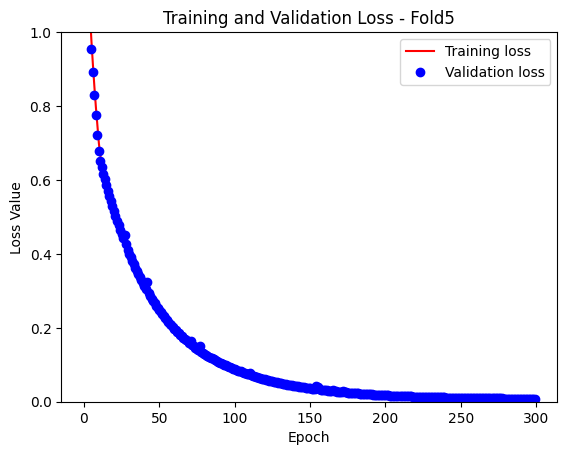

Accuracy: 0.9999350248877682+- 0.00010849006687062266
Jaccard: 0.857174347682658+- 0.13824093486286218
Dice: 0.914876954197767+- 0.11332895836979749
Precision: 0.9105490453895302+- 0.12617137191699007
Recall: 0.9314245069034686+- 0.11487438834740515


In [13]:

acc = []
jacc = []
f1 = []
prec = []
rec = []

kf = KFold(n_splits=k, shuffle=True, random_state=28)
f = 1

for train_ind, test_ind in kf.split(X):
    if f < 2:
        f += 1
        continue
    X_train, X_val, y_train, y_val = X[train_ind], X[test_ind], y[train_ind], y[test_ind]
    
    y_train = {
        'unet3plus_output_sup0_activation': y_train,
        'unet3plus_output_sup1_activation': y_train,
        'unet3plus_output_sup2_activation': y_train,
        'unet3plus_output_final_activation': y_train
    }
    y_val = {
        'unet3plus_output_sup0_activation': y_val,
        'unet3plus_output_sup1_activation': y_val,
        'unet3plus_output_sup2_activation': y_val,
        'unet3plus_output_final_activation': y_val
    }

    model = models.unet_3plus_2d((512, 512, 1), n_labels=1, filter_num_down=[16, 32, 64, 128],
                             filter_num_skip='auto', filter_num_aggregate='auto',
                             stack_num_down=2, stack_num_up=1, activation='ReLU', output_activation='Sigmoid',
                             batch_norm=True, pool='max', unpool=False, deep_supervision=True, name='unet3plus')
    
    model.compile(
        optimizer='adam',
        loss={
            'unet3plus_output_sup0_activation': 'binary_crossentropy',
            'unet3plus_output_sup1_activation': 'binary_crossentropy',
            'unet3plus_output_sup2_activation': 'binary_crossentropy',
            'unet3plus_output_final_activation': 'binary_crossentropy'
        },
        metrics={'unet3plus_output_final_activation': ['accuracy', tf.keras.metrics.Recall(name='recall')]}
    )
    
    checkpoint_filepath = 'model_' + str(f)+'fold.keras'
    callbacks = [
            tf.keras.callbacks.EarlyStopping(patience=20, monitor='val_loss'),
            tf.keras.callbacks.TensorBoard(log_dir='logs'),
            tf.keras.callbacks.ModelCheckpoint(
                filepath=checkpoint_filepath,
                save_weights_only=False,
                monitor='val_recall',
                mode='max',
                save_best_only=True,
                verbose=1)]
    
    model.fit(X_train, y_train, validation_data=(X_val,y_val), batch_size=16, epochs=300, callbacks=callbacks)
    model.save('model_' + str(f)+'fold.keras')
    loss = model.history.history['loss']
    val_loss = model.history.history['val_loss']
    
    plt.figure()
    plt.plot( loss, 'r', label='Training loss')
    plt.plot( val_loss, 'bo', label='Validation loss')
    plt.title('Training and Validation Loss - Fold' + str(f))
    plt.xlabel('Epoch')
    plt.ylabel('Loss Value')
    plt.ylim([0, 1])
    plt.legend()
    plt.show()
    
    for i in range(0, len(X_val)):
        sample_image = X_val[i]
        sample_mask = y_val['unet3plus_output_final_activation'][i].astype(np.uint8).flatten()
        prediction = model.predict(sample_image[tf.newaxis, ...],verbose=0)[0]
        predicted_mask = (prediction > 0.5).astype(np.uint8).flatten()
            
        acc.append(accuracy_score(sample_mask, predicted_mask))
        jacc.append(jaccard_score(sample_mask, predicted_mask))
        f1.append(f1_score(sample_mask, predicted_mask))
        prec.append(precision_score(sample_mask, predicted_mask))
        rec.append(recall_score(sample_mask, predicted_mask))

    del model 

    tf.keras.backend.clear_session()

    f+=1
    
print("Accuracy: "+ str(np.mean(acc)) + "+- " + str(np.std(acc)))
print("Jaccard: "+ str(np.mean(jacc)) + "+- " + str(np.std(jacc)))
print("Dice: "+ str(np.mean(f1)) + "+- " + str(np.std(f1)))
print("Precision: "+ str(np.mean(prec)) + "+- " + str(np.std(prec)))
print("Recall: "+ str(np.mean(rec)) + "+- " + str(np.std(rec)))

In [14]:
print("Accuracy: "+ str(np.mean(acc)) + "+- " + str(np.std(acc)))
print("Jaccard: "+ str(np.mean(jacc)) + "+- " + str(np.std(jacc)))
print("Dice: "+ str(np.mean(f1)) + "+- " + str(np.std(f1)))
print("Precision: "+ str(np.mean(prec)) + "+- " + str(np.std(prec)))
print("Recall: "+ str(np.mean(rec)) + "+- " + str(np.std(rec)))

Accuracy: 0.9999350248877682+- 0.00010849006687062266
Jaccard: 0.857174347682658+- 0.13824093486286218
Dice: 0.914876954197767+- 0.11332895836979749
Precision: 0.9105490453895302+- 0.12617137191699007
Recall: 0.9314245069034686+- 0.11487438834740515


In [18]:
acc_mean_fold = []
jacc_mean_fold = []
f1_mean_fold = []
prec_mean_fold = []
rec_mean_fold = []

acc_std_fold = []
jacc_std_fold = []
f1_std_fold = []
prec_std_fold = []
rec_std_fold = []


f = 0
kf = KFold(n_splits=k, shuffle=True, random_state=28)
for train_ind, test_ind in tqdm(kf.split(X), total=kf.get_n_splits(), desc="k-fold"):
    X_train, X_val, y_train, y_val = X[train_ind], X[test_ind], y[train_ind], y[test_ind]

    acc= []
    jacc = []
    f1 = []
    prec = []
    rec = []
    
    model = tf.keras.models.load_model('UNET3Plus 5-fold models/model_'+str(f+1)+'fold.keras')

    for i in range(0, len(X_val)):
        sample_image = X_val[i]
        sample_mask = y_val[i].astype(np.uint8).flatten()
        prediction = model.predict(sample_image[tf.newaxis, ...],verbose=0)[0]
        predicted_mask = (prediction > 0.5).astype(np.uint8).flatten()
            
        acc.append(accuracy_score(sample_mask, predicted_mask))
        jacc.append(jaccard_score(sample_mask, predicted_mask))
        f1.append(f1_score(sample_mask, predicted_mask))
        prec.append(precision_score(sample_mask, predicted_mask))
        rec.append(recall_score(sample_mask, predicted_mask))

    acc_mean_fold.append(np.mean(acc))
    acc_std_fold.append(np.std(acc))
    jacc_mean_fold.append(np.mean(jacc))
    jacc_std_fold.append(np.std(jacc))
    f1_mean_fold.append(np.mean(f1))
    f1_std_fold.append(np.std(f1))
    prec_mean_fold.append(np.mean(prec))
    prec_std_fold.append(np.std(prec))
    rec_mean_fold.append(np.mean(rec))
    rec_std_fold.append(np.std(rec))
    
    print("Model - Fold" + str(f+1)+ "Accuracy: " + str(acc_mean_fold[-1]))
    print("Model - Fold" + str(f+1)+ "Jaccard: " + str(jacc_mean_fold[-1]))
    print("Model - Fold" + str(f+1)+ "Dice: " + str(f1_mean_fold[-1]))
    print("Model - Fold" + str(f+1)+ "Precision: " + str(prec_mean_fold[-1]))
    print("Model - Fold" + str(f+1)+ "Recall: " + str(rec_mean_fold[-1]))

    f += 1

k-fold:   0%|                                                                                     | 0/5 [00:00<?, ?it/s]/home/mbouzon/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
k-fold:  20%|███████████████▍                                                             | 1/5 [00:29<01:59, 29.90s/it]

Model - Fold1Accuracy: 0.9999474797930036
Model - Fold1Jaccard: 0.9288308115245725
Model - Fold1Dice: 0.9568944121869207
Model - Fold1Precision: 0.9725481261891848
Model - Fold1Recall: 0.942962405226504


k-fold:  40%|██████████████████████████████▊                                              | 2/5 [00:59<01:28, 29.57s/it]

Model - Fold2Accuracy: 0.9999668484642392
Model - Fold2Jaccard: 0.9235692287645353
Model - Fold2Dice: 0.9565598848217434
Model - Fold2Precision: 0.9820128952609001
Model - Fold2Recall: 0.939832470881551


/home/mbouzon/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
k-fold:  60%|██████████████████████████████████████████████▏                              | 3/5 [01:29<00:59, 29.91s/it]

Model - Fold3Accuracy: 0.9999211856297084
Model - Fold3Jaccard: 0.8627400900934363
Model - Fold3Dice: 0.9181197591774631
Model - Fold3Precision: 0.9897694981166969
Model - Fold3Recall: 0.866294290448743


k-fold:  80%|█████████████████████████████████████████████████████████████▌               | 4/5 [01:59<00:29, 29.91s/it]

Model - Fold4Accuracy: 0.9999387821037612
Model - Fold4Jaccard: 0.8525940608082604
Model - Fold4Dice: 0.9109399023176427
Model - Fold4Precision: 0.860552017227781
Model - Fold4Recall: 0.9898445735323055


k-fold: 100%|█████████████████████████████████████████████████████████████████████████████| 5/5 [02:29<00:00, 29.96s/it]

Model - Fold5Accuracy: 0.9999641372772035
Model - Fold5Jaccard: 0.9427385821275416
Model - Fold5Dice: 0.9650788114741166
Model - Fold5Precision: 0.9745965618860989
Model - Fold5Recall: 0.9603712280554825


In [19]:
print("Accuracy: "+ str(np.mean(acc_mean_fold)*100) + " +- " + str(np.std(acc_std_fold)*100))
print("Jaccard: "+ str(np.mean(jacc_mean_fold)*100) + " +- " + str(np.std(jacc_std_fold)*100))
print("Dice: "+ str(np.mean(f1_mean_fold)*100) + " +- " + str(np.std(f1_std_fold)*100))
print("Precision: "+ str(np.mean(prec_mean_fold)*100) + " +- " + str(np.std(prec_std_fold)*100))
print("Recall: "+ str(np.mean(rec_mean_fold)*100) + " +- " + str(np.std(rec_std_fold)*100))

Accuracy: 99.99476866535831 +- 0.006978325760254038
Jaccard: 90.20945546636693 +- 1.876275338887781
Dice: 94.15185539955773 +- 1.6314007095769176
Precision: 95.58958197361322 +- 4.129742036705088
Recall: 93.98609936289174 +- 3.9036395353770534


In [ ]:
best_model = tf.keras.models.load_model('UNET3Plus 5-fold models/model_1fold.keras')

In [ ]:

kf = KFold(n_splits=k, shuffle=True, random_state=28)
for i, (train_ind, test_ind) in enumerate(kf.split(X)):
    if i == 0:
        X_train, X_val, y_train, y_val = X[train_ind], X[test_ind], y[train_ind], y[test_ind]
        break

In [ ]:
def display(display_list):
  plt.figure(figsize=(15, 15))

  title = ['Input image', 'True mask', 'Predicted mask']

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.utils.array_to_img(display_list[i]), cmap='gray')
    plt.axis('off')
  plt.show()
  
i = random.randint(0, len(X_val))
sample_image = X_val[i]
sample_mask = y_val[i]
prediction = best_model.predict(sample_image[tf.newaxis, ...])[0]
predicted_mask = (prediction > 0.5).astype(np.uint8)
display([sample_image, sample_mask,predicted_mask])

sample_mask = y_val[i].astype(np.uint8).flatten()
predicted_mask = predicted_mask.flatten()


print("Accuracy: "+ str(accuracy_score(sample_mask, predicted_mask)))
print("Jaccard: "+ str(jaccard_score(sample_mask, predicted_mask)))
print("Dice: "+ str((2*jaccard_score(sample_mask, predicted_mask))/(1+jaccard_score(sample_mask, predicted_mask))))
print("Precision: "+ str(precision_score(sample_mask, predicted_mask)))
print("Recall: "+ str(recall_score(sample_mask, predicted_mask)))

In [ ]:
predicted_mask.shape